# Setup

In [7]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [6]:
ls

Hierarchical Clustering (1).ipynb  Universities (1).csv
Hierarchical.py                    kmeans.py


In [7]:
Univ = pd.read_csv("Universities (1).csv")

In [8]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


# scaling info

# Hierarchical 

In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [10]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [11]:
df_norm.iloc[:,:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


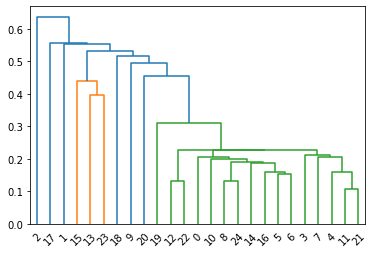

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))


In [13]:
??AgglomerativeClustering


In [14]:
#"euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed".

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')


In [16]:
hc.fit_predict(df_norm)


array([0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0])

In [17]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [18]:
Univ['h_clusterid'] = y_hc 

In [19]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [20]:
Univ.groupby(["h_clusterid"])["Univ"].apply(lambda x:tuple(x))

h_clusterid
0    (Brown, Columbia, Cornell, Dartmouth, Duke, Ge...
1                      (PennState, Purdue, UWisconsin)
2                                          (TexasA&M,)
3                                           (CalTech,)
4                                               (CMU,)
Name: Univ, dtype: object

In [19]:
Univ[Univ["Univ"].isin(["PennState","Purdue","UWisconsin"])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
23,UWisconsin,1085,40,69,15,11857,71,1


# k means

In [22]:
Univ = pd.read_csv("Universities (1).csv")

In [23]:
df_norm = norm_func(Univ.iloc[:,1:])

In [24]:
from sklearn.cluster import KMeans

In [25]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [26]:
model_kmeans.labels_

array([2, 3, 4, 0, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 4, 0, 4, 0,
       0, 1, 2], dtype=int32)

In [27]:
md=pd.Series(model_kmeans.labels_)

In [28]:
#Complete-linkage clustering - Wikipedia

In [29]:
Univ["labels"]=pd.Series(model_kmeans.labels_)

In [30]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [31]:
Univ.groupby(["labels"])["Univ"].apply(lambda x:tuple(x))

labels
0    (Columbia, Cornell, Georgetown, Northwestern, ...
1            (PennState, Purdue, TexasA&M, UWisconsin)
2    (Brown, Dartmouth, Duke, Harvard, MIT, Princet...
3                              (CalTech, JohnsHopkins)
4                         (CMU, UCBerkeley, UMichigan)
Name: Univ, dtype: object

In [32]:
Univ[Univ["Univ"].isin(["PennState","Purdue","UWisconsin","TexasA&M"])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [33]:
Univ[Univ["Univ"].isin(["CalTech","JohnsHopkins"])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
1,CalTech,1415,100,25,6,63575,81,3
9,JohnsHopkins,1305,75,44,7,58691,87,3


# DBSCAN

In [1]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [23]:
from sklearn.datasets import make_moons
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,0.991790,0.127877,0
1,0.981559,0.191159,0
2,0.008210,0.372123,1
3,1.000000,0.000000,0
4,-0.672301,0.740278,0


In [25]:
y

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

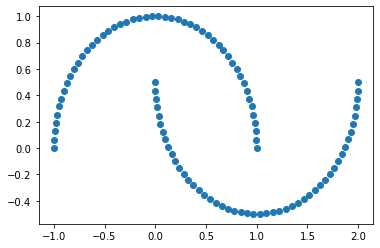

In [5]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

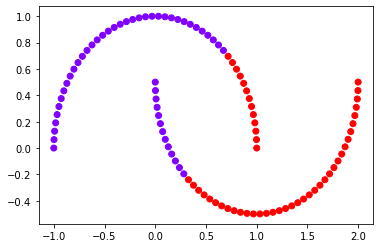

In [31]:
#using kmeans
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=model.labels_,cmap=plt.cm.rainbow)

In [47]:
model.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

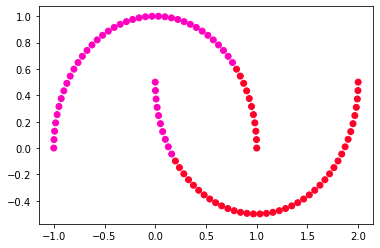

In [33]:
#using hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.scatter(data["f1"],data["f2"],c=cluster.fit_predict(data.iloc[:,:2]),cmap=plt.cm.gist_rainbow)


In [ ]:
core ---> boundary ---> noise 



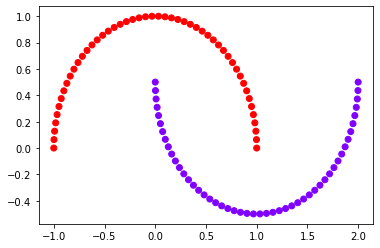

In [34]:
#DBSCAN

dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=claas_pr,cmap=plt.cm.rainbow_r)



In [54]:
claas_pr

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

 # finding the optimal number of clusters


In [4]:
import seaborn as sns
iris=sns.load_dataset("iris") 


In [5]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,virginica
80,5.5,2.4,3.8,1.1,versicolor
87,6.3,2.3,4.4,1.3,versicolor
52,6.9,3.1,4.9,1.5,versicolor
147,6.5,3.0,5.2,2.0,virginica
92,5.8,2.6,4.0,1.2,versicolor
97,6.2,2.9,4.3,1.3,versicolor
73,6.1,2.8,4.7,1.2,versicolor
24,4.8,3.4,1.9,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa


In [8]:
nc=[1,2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(iris.iloc[:,:4])
    iner.append(km.inertia_)

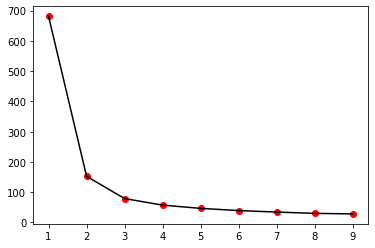

In [9]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# silhouette_score 

In [10]:
from sklearn.metrics import silhouette_score as sil

In [13]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(iris.iloc[:,:4])
    sc_score.append(sil(iris.iloc[:,:4],y))

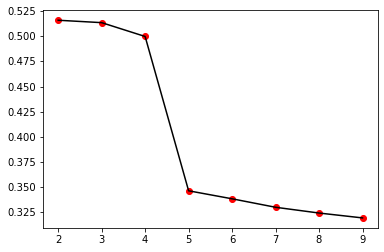

In [14]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [23]:
sc_score

[0.5159829508133179,
 0.5135953221192219,
 0.49981282941719796,
 0.34617396930269595,
 0.3382031379620209,
 0.3297649053400506,
 0.3240250265714258,
 0.3191681237635773]

# calinski_harabaz_score

In [36]:
import sklearn

In [37]:
sklearn.__version__

'0.24.1'

In [18]:
from sklearn.metrics import calinski_harabasz_score

In [20]:
nc=[2,3,4,5,6,7,8,9]
ch_score=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    ch_score.append(chs(iris.iloc[:,:4],y))

/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/depre

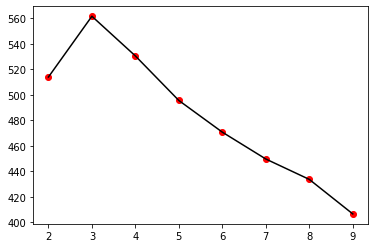

In [21]:
plt.plot(nc,ch_score,color="black")
plt.scatter(nc,ch_score,color="red")
plt.show()